@author: Betty Au (bettyau), Claire Cai (ClaireCai97)

# Step 5: Modeling

We will examine supervised machine learning models on sports betting of NHL hockey data. The target and control features are defined as follows: <br>
- <b>Target Feature</b>: ```won``` <br>
- <b>Control Features</b>: ```pim```, ```powerPlayGoals```, ```faceOffWinPercentage```, ```shots```, ```goals```, ```takeaways```, ```hits```, ```blockedShots```, ```giveaways```, ```missedShots```, ```penalties```, ```timeOnIce```, ```evenTimeOnIce```, ```shortHandedTimeOnIce```, ```powerPlayTimeOnIce```, ```hoa_away```, ```hoa_home```, ```settledIn_OT```, ```settledIn_REG```, ```startRinkSide_left```, ```startRinkSide_right```,
```goalieReplacement_No```, ```goalieReplacement_Yes``` <br>

The modeling objective is to investigate factors that contribute to the outcome of a hockey game and predict which NHL hockey team will win a game. The results can be used to make data-driven decisions regarding the game's outcome. The following set of models is used:
- <b>Logistic Regression</b>
- <b>Artificial Neural Networks</b>
- <b>Random Forest</b>
- <b>Gradient Boosting</b>

Specifically, logistic regression will serve as a baseline model for the classification problem and the rest of the classification models will be built and compared against its model performance, as well as feature importance. 

## 5.1 Load Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import ensemble, model_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import (
    confusion_matrix, 
    accuracy_score, 
    precision_recall_curve,
    average_precision_score,
    roc_curve,
    roc_auc_score,
    classification_report,
    plot_confusion_matrix
)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "INSY695_Group_Project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

## 5.2 Data import

In [2]:
df = pd.read_csv("/Users/bettyau/Downloads/readyformodel_V2.1.csv")

# define x and y
X, y = df.drop(['won'], axis=1), df.won

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [3]:
# standarize the dataset
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.fit_transform(X_test) # scaler.transform(X_test)

## 5.3 Helpful function

In [4]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Classification report

In [5]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

### PR Curve

In [6]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

### ROC Curve

In [7]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## 5.4 Build Model

### 5.4.1 Logistic Regression

In [8]:
lr = LogisticRegression()
model1 = lr.fit(X_train_sc, y_train)

In [9]:
# cross-validation
y_test_pred = model1.predict(X_test_sc)
accuracy_lr = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_lr)

0.6689294026377036


In [10]:
# get importance
importance = model1.coef_[0]

# summarize feature importance
pd.DataFrame(list(zip(X_train.columns, importance)), 
             columns = ['predictor','feature importance']).sort_values("feature importance", ascending = False)

,predictor,feature importance
18,settledIn_REG,1.214892
17,settledIn_OT,1.181894
4,goals,0.585512
1,powerPlayGoals,0.380196
21,goalieReplacement_No,0.268579
16,hoa_home,0.087368
13,shortHandedTimeOnIce,0.084293
3,shots,0.024857
2,faceOffWinPercentage,0.017338
9,missedShots,0.006951


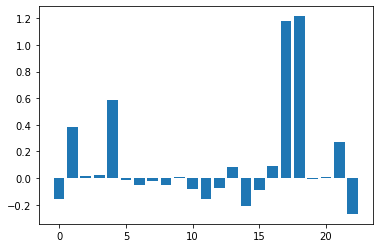

In [11]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Validation Result:

accuracy score: 0.6689



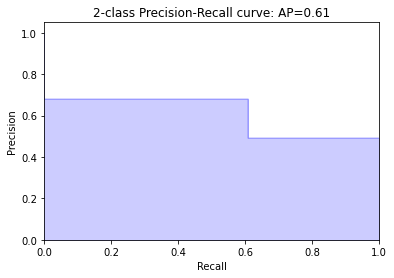

roc auc score: 0.6677571254906322



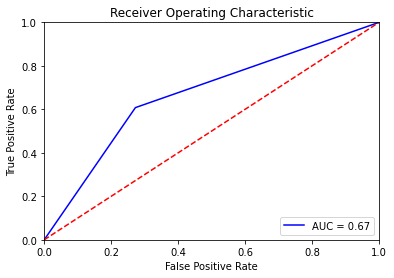

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.73      0.69      5257
           1       0.68      0.61      0.64      5055

    accuracy                           0.67     10312
   macro avg       0.67      0.67      0.67     10312
weighted avg       0.67      0.67      0.67     10312


Confusion Matrix: 
 [[3825 1432]
 [1982 3073]]

End of validation Result



/Users/bettyau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


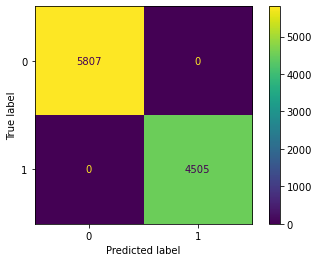

In [12]:
# classfication report
clf_score(model1, X_train_sc, y_train, X_test_sc, y_test, train=False)

### 5.4.2 ANN

In [13]:
mlp = MLPClassifier(hidden_layer_sizes = (5),max_iter = 1000, random_state = 5) 
model2 = mlp.fit(X_train_sc, y_train)

In [14]:
# cross-validation
y_test_pred = model2.predict(X_test_sc)
accuracy_ANN = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_ANN) 

0.6938518231186966


Validation Result:

accuracy score: 0.6939



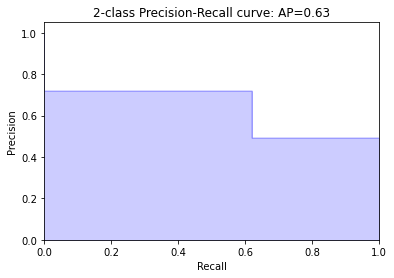

roc auc score: 0.692417363726044



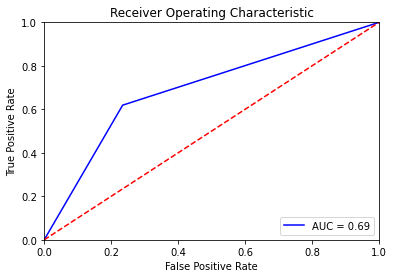

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      5257
           1       0.72      0.62      0.66      5055

    accuracy                           0.69     10312
   macro avg       0.70      0.69      0.69     10312
weighted avg       0.70      0.69      0.69     10312


Confusion Matrix: 
 [[4025 1232]
 [1925 3130]]

End of validation Result



/Users/bettyau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


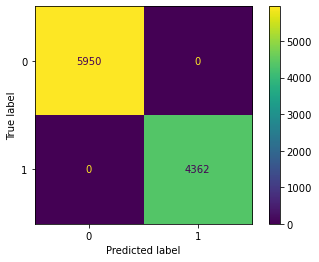

In [15]:
# classfication report
clf_score(model2, X_train_sc, y_train, X_test_sc, y_test, train=False)

In ANN there is no clear heuristic way to perform feature importance.

There are two very popular alternative approaches:

1. CW - Connection weight algorithm
2. Garson's algorithm

Both provide a calculated relative score of each feature's importance. There are many resources debating which is better, including more algorithms of the same family. We will explore these two approaches in the second half of the course. 

### 5.4.3 Random Forest

In [16]:
randomforest = RandomForestClassifier(random_state = 5,oob_score = True) 
model3 = randomforest.fit(X_train, y_train)

In [17]:
# cross-validation
model3.oob_score_ 

0.7523821069220512

In [18]:
# get importance
importance = model3.feature_importances_

# summarize feature importance
pd.DataFrame(list(zip(X_train.columns, importance)), 
             columns = ['predictor','feature importance']).sort_values("feature importance", ascending = False)

,predictor,feature importance
11,timeOnIce,0.164544
13,shortHandedTimeOnIce,0.107938
12,evenTimeOnIce,0.102960
14,powerPlayTimeOnIce,0.094662
4,goals,0.079308
0,pim,0.072245
2,faceOffWinPercentage,0.043572
10,penalties,0.039125
6,hits,0.033681
3,shots,0.032469


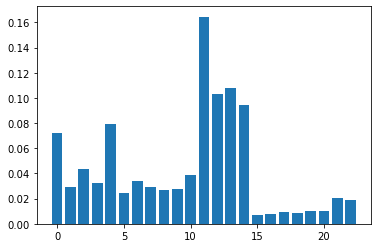

In [19]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Validation Result:

accuracy score: 0.7638



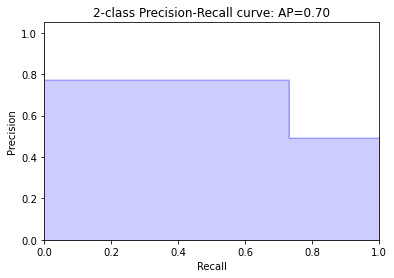

roc auc score: 0.7631589889943737



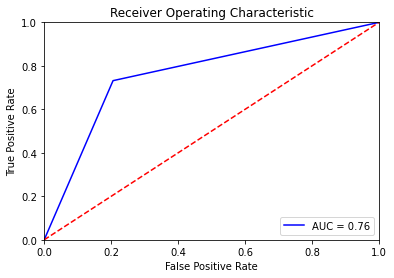

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      5257
           1       0.77      0.73      0.75      5055

    accuracy                           0.76     10312
   macro avg       0.76      0.76      0.76     10312
weighted avg       0.76      0.76      0.76     10312


Confusion Matrix: 
 [[4176 1081]
 [1355 3700]]



/Users/bettyau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


End of validation Result



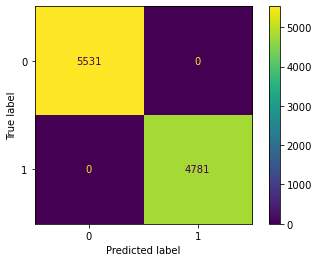

In [20]:
# classification report
clf_score(model3, X_train, y_train, X_test, y_test, train=False)

### 5.4.4 Gradient Boosting

In [21]:
gbt = GradientBoostingClassifier(random_state = 5)
model4 = gbt.fit(X_train_sc, y_train)

In [22]:
# cross-validation
y_test_pred = model4.predict(X_test_sc)
accuracy_gbt=metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_gbt)

0.7190651667959659


In [23]:
# get importance
importance = model4.feature_importances_
# summarize feature importance
pd.DataFrame(list(zip(X_train.columns, importance)), 
             columns = ['predictor','feature importance']).sort_values("feature importance", ascending = False)

,predictor,feature importance
11,timeOnIce,3.209036e-01
4,goals,2.643736e-01
1,powerPlayGoals,8.172163e-02
21,goalieReplacement_No,7.042770e-02
0,pim,6.177498e-02
22,goalieReplacement_Yes,6.076237e-02
17,settledIn_OT,4.168470e-02
13,shortHandedTimeOnIce,3.423580e-02
14,powerPlayTimeOnIce,1.626676e-02
16,hoa_home,1.360430e-02


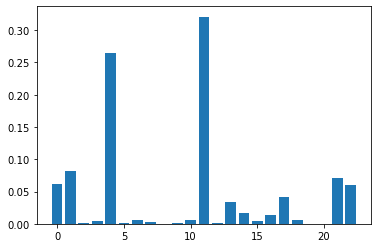

In [24]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Validation Result:

accuracy score: 0.7191



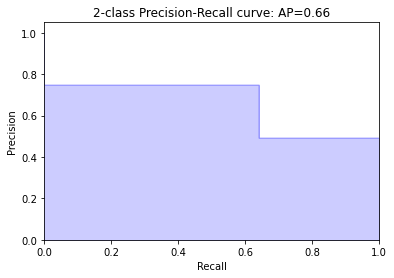

roc auc score: 0.7175871764029196



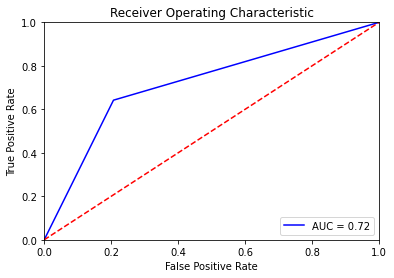

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      5257
           1       0.75      0.64      0.69      5055

    accuracy                           0.72     10312
   macro avg       0.72      0.72      0.72     10312
weighted avg       0.72      0.72      0.72     10312


Confusion Matrix: 
 [[4169 1088]
 [1809 3246]]

End of validation Result



/Users/bettyau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


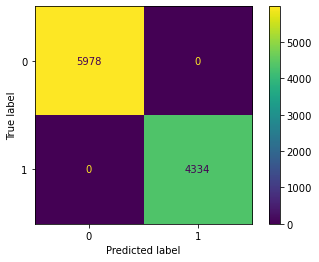

In [25]:
# classification report
clf_score(model4, X_train_sc, y_train, X_test_sc, y_test, train=False)

## 5.5 Hyperparamter tuning

### 5.5.1 Hyperparameter tuning with Grid Search

In [26]:
clf_rf_grid = ensemble.RandomForestClassifier()
params = {
    "max_features": [0.4, "auto"],
    "n_estimators": [10, 100, 200],
    "min_samples_leaf": [1, 0.1],
    "random_state": [5],
}
cv = model_selection.GridSearchCV(clf_rf_grid, params,
                                  n_jobs=-1).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 0.4, 'min_samples_leaf': 1, 'n_estimators': 200, 'random_state': 5}


### 5.5.2 Use best hyperparameters with RF

In [27]:
rf_best = ensemble.RandomForestClassifier(
    **{
        "max_features": 0.4,
        "min_samples_leaf": 1,
        "n_estimators": 200,
        "random_state": 5,
    })
rf_best.fit(X_train, y_train)
rf_best.score(X_test, y_test)

0.7697827773467805

Validation Result:

accuracy score: 0.7698



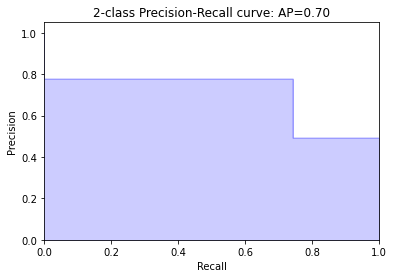

roc auc score: 0.7692991324082609



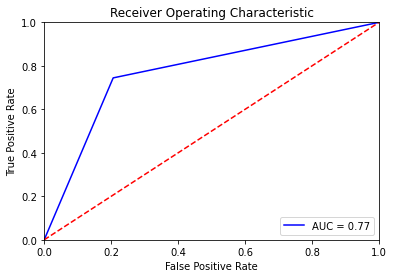

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.79      0.78      5257
           1       0.78      0.74      0.76      5055

    accuracy                           0.77     10312
   macro avg       0.77      0.77      0.77     10312
weighted avg       0.77      0.77      0.77     10312


Confusion Matrix: 
 [[4174 1083]
 [1291 3764]]



/Users/bettyau/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


End of validation Result



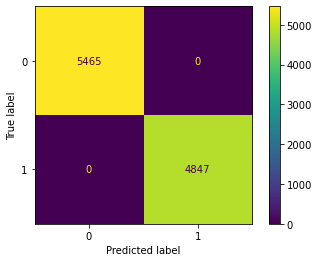

In [28]:
# classification report
clf_score(rf_best, X_train, y_train, X_test, y_test, train=False)

## 5.6 Modeling results

We display the visualization of validation result, roc auc score, classification report and confusion matrix for 4 models respectively by using the function ```clf_score```. The visualization is more intuitive than numbers to show the results of cross-validation. Based on the output above, we can conclude that ```Random Forest``` generates the highest number of correct predictions regarding the game's outcome. The most contributing factors are outlined below: 

* ```timeOnIce```
* ```shortHandedTimeOnIce```
* ```evenTimeOnIce```
* ```powerPlayTimeOnIce```
* ```goals```
* ```pim```

Based on cross validation of the Random Forest model, the accuracy score improves from 0.7638 to 0.7698 after the hyperparameters have been tuned. The detailed process is showed in Section 5.5. 

In Section 5.5, you can see that we choose to tune the hyperparameters:

* ```max_features```
* ```n_estimators```
* ```min_samples_leaf```
* ```random_state```

## 5.7 Modeling insights and limitations

The modeling output implies that decision-makers should focus on the top contributing factors such as time on ice, short-handed time on ice, even time on ice, power-play time on ice, number of goals and penalty infraction minutes 
when judging the outcome of the hockey game with the first-period statistics. By leveraging the Random Forest model, users can utilize hockey game statistics to determine the game’s outcomes as to which team will win or lose after the first period. The model generates accurate predictions on sports betting over randomly guessing the outcome. Also, the model performance validates the proof of value and achieves the business objective to develop a predictive model with an accuracy score higher than 52.4% in order to break even. 

The system limitation is that Sports analytics is generally difficult to model with the best models performing at accuracy levels ranging from 50-70%. However, our model performs very well at the accuracy level of around 76%, which potentially faces overfitting issues. Our team will carry over investigating this topic in the second half of the course.